In [4]:
import math
import numpy as np
import scipy
from scipy import sparse
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import matplotlib.pyplot as plt
from lib_p1 import *

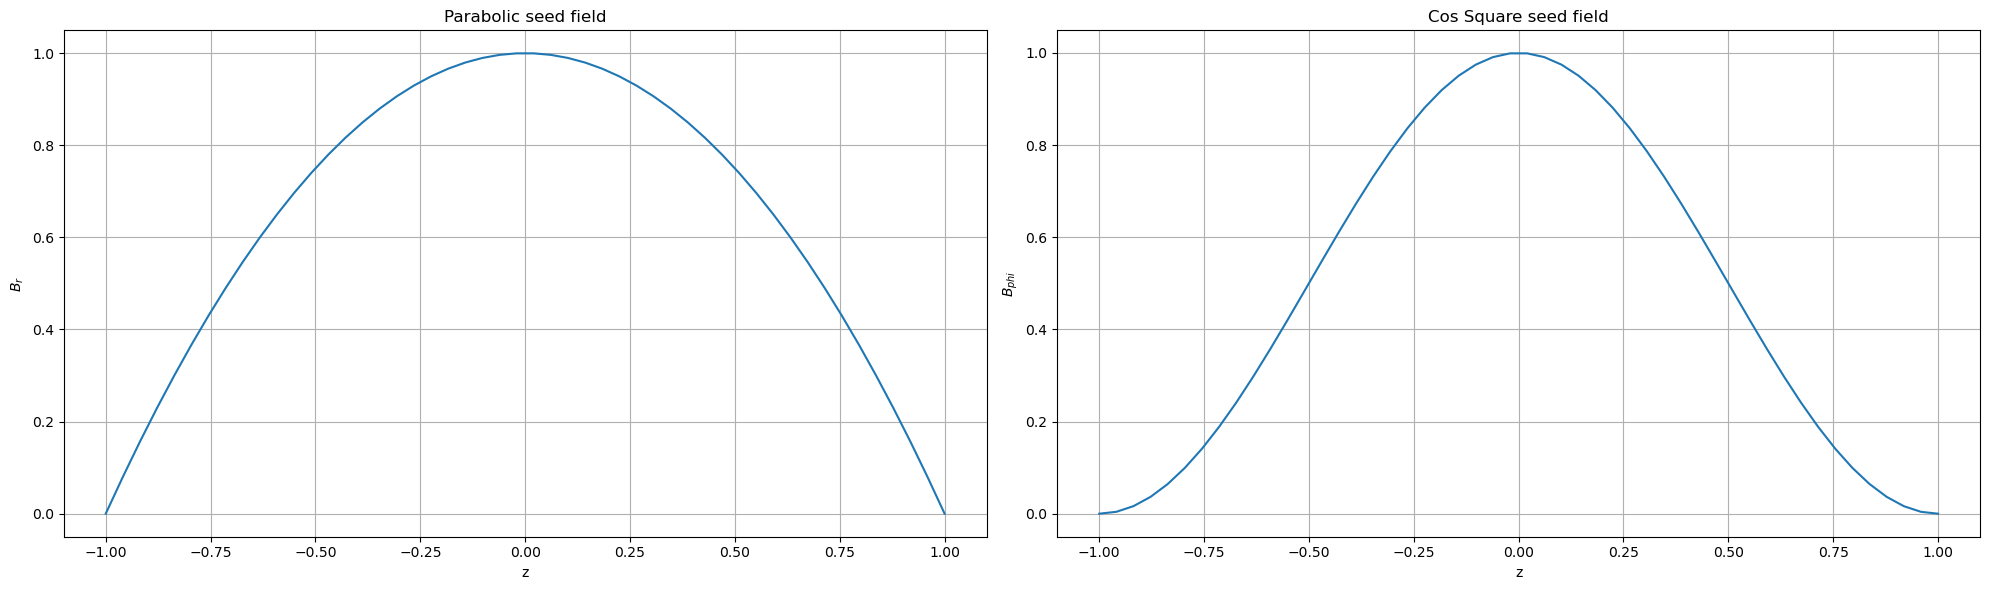

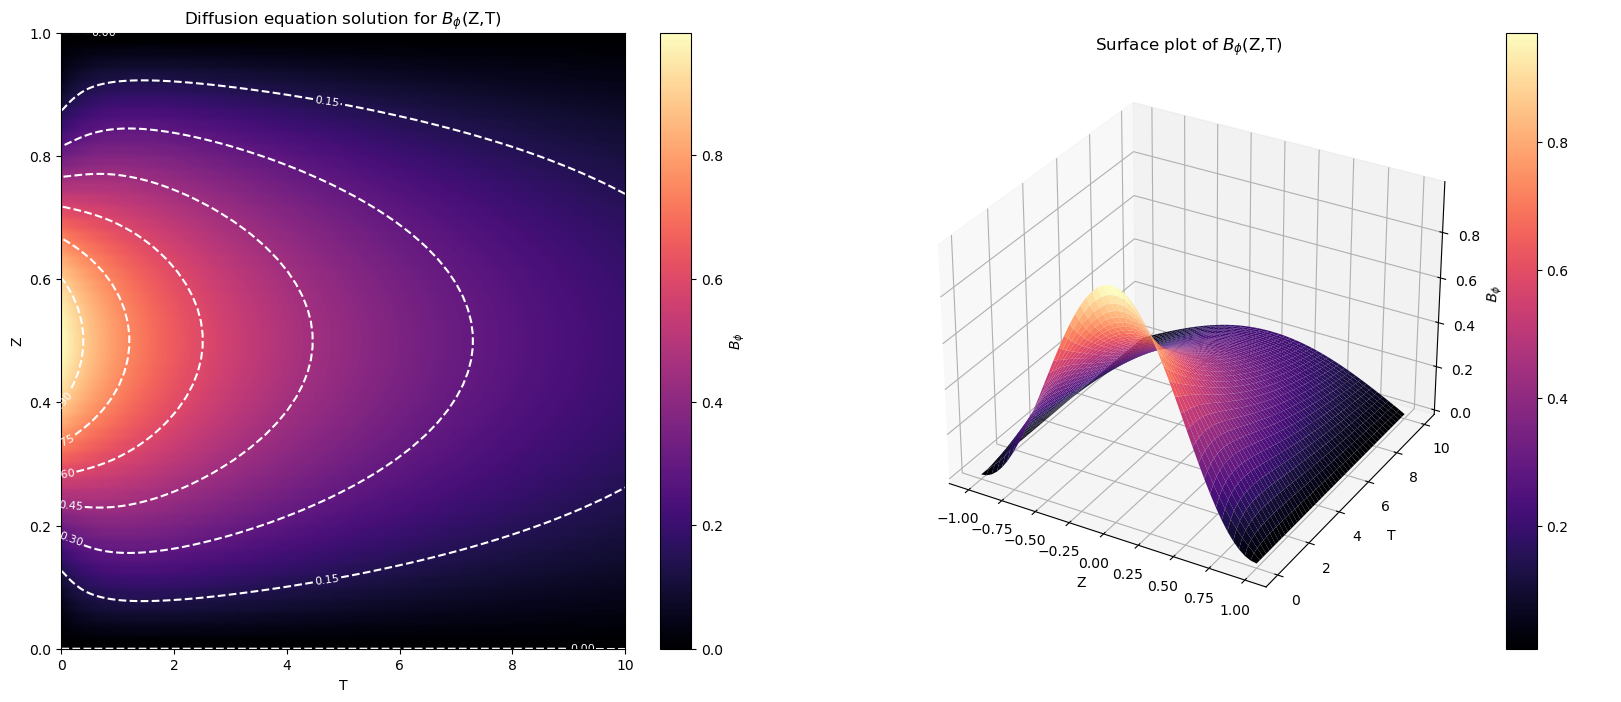

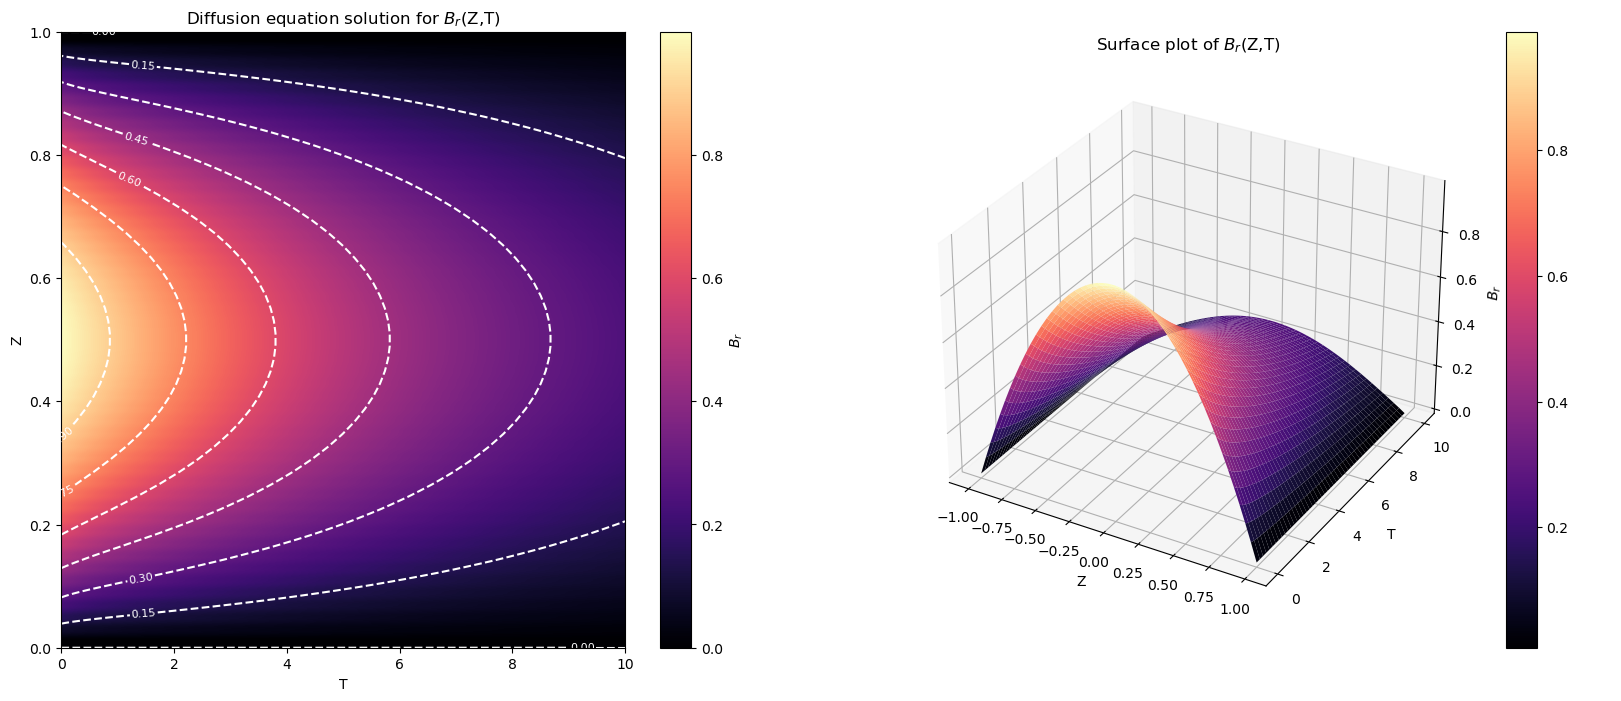

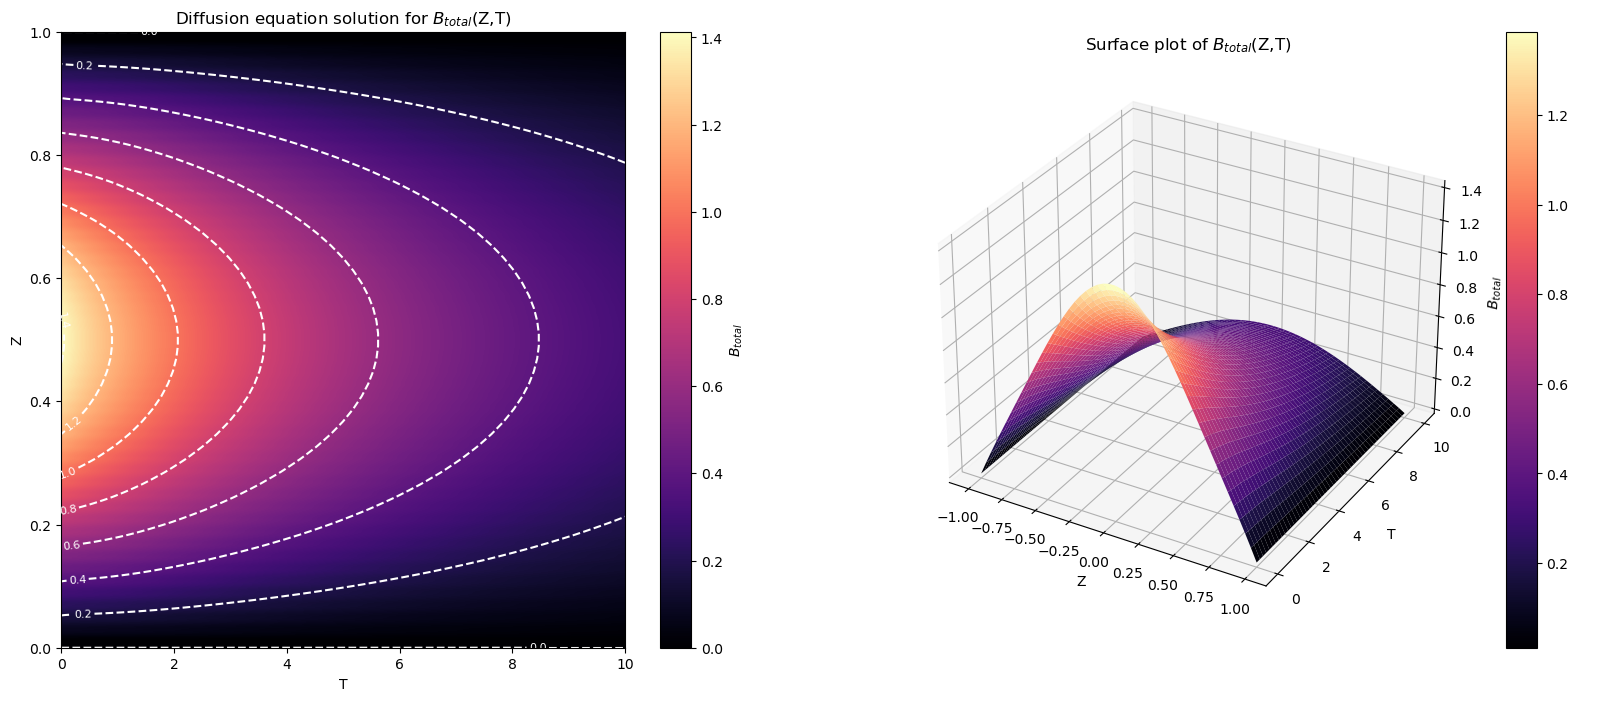

/tmp/ipykernel_20998/838070318.py:57: RuntimeWarning: invalid value encountered in divide
  pitch_angle = np.degrees(np.arctan(U_r/U_phi))


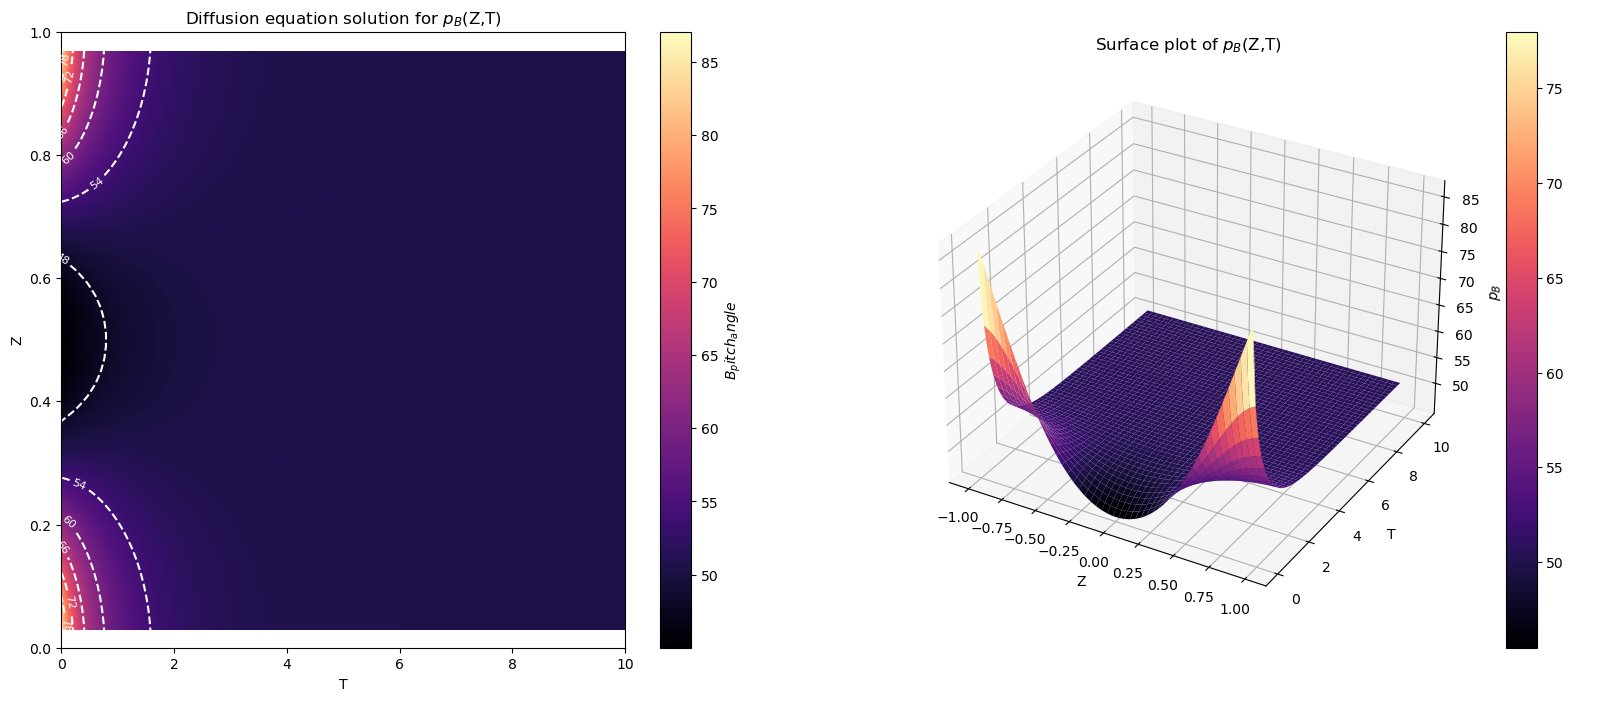

In [5]:
T = 10  # simulation time
L = 1   # half length of the box
M = 50  # spacing in L
N = 5000 # spacing in T

#'''
#Initial Conditions 1
title_1 = r'Parabolic seed field'
title_2 = r'Cos Square seed field'
def init_cond_Br(z):
	return 1-(z)**2

def init_cond_Bphi(z):
	return np.cos(np.pi*(z)/2)**2
#'''

z = np.linspace(-L, L, M)
#print(z)


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()


U_phi, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=init_cond_Bphi, eta_T = 3.48e-2, T=T, L=L)

U_r, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=init_cond_Br, eta_T = 3.48e-2, T=T, L=L)

#'''

plot_B(U_phi, tspan, xspan, T, L, '\phi')
plot_B(U_r, tspan, xspan, T, L, 'r')
#plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}')
#plot_B_animation(U_r, tspan, xspan, T, L, 'r')

B_total = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total, tspan, xspan, T, L, '{total}')
#plot_B_animation(B_total, tspan, xspan, T, L, '{total}')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
#plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle')

#'''

-0.061742352058482206 0.12501188789563342


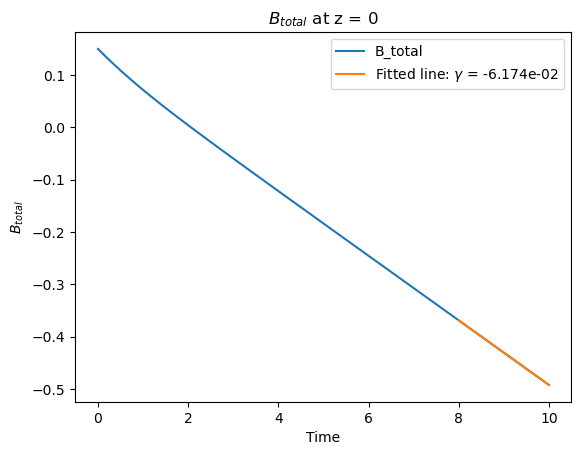

In [6]:
B_mid = np.log10(B_total[int(M/2),:])
#m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)
m, c = np.polyfit(tspan[-1000:], B_mid[-1000:], 1)

plt.plot(tspan, B_mid, label='B_total', zorder = 1)
print(m,c)

# Calculate fitted line
fitted_line = m * tspan[-1000:] + c


# Plot fitted line
plt.plot(tspan[-1000:], fitted_line, label=f'Fitted line: $\gamma$ = {m:.3e}', zorder = 2)

# Add x and y labels
plt.xlabel('Time')
plt.ylabel('$B_{total}$')
plt.title('$B_{total}$ at z = 0')

# Show legend
plt.legend()

# Display the plot
plt.show()

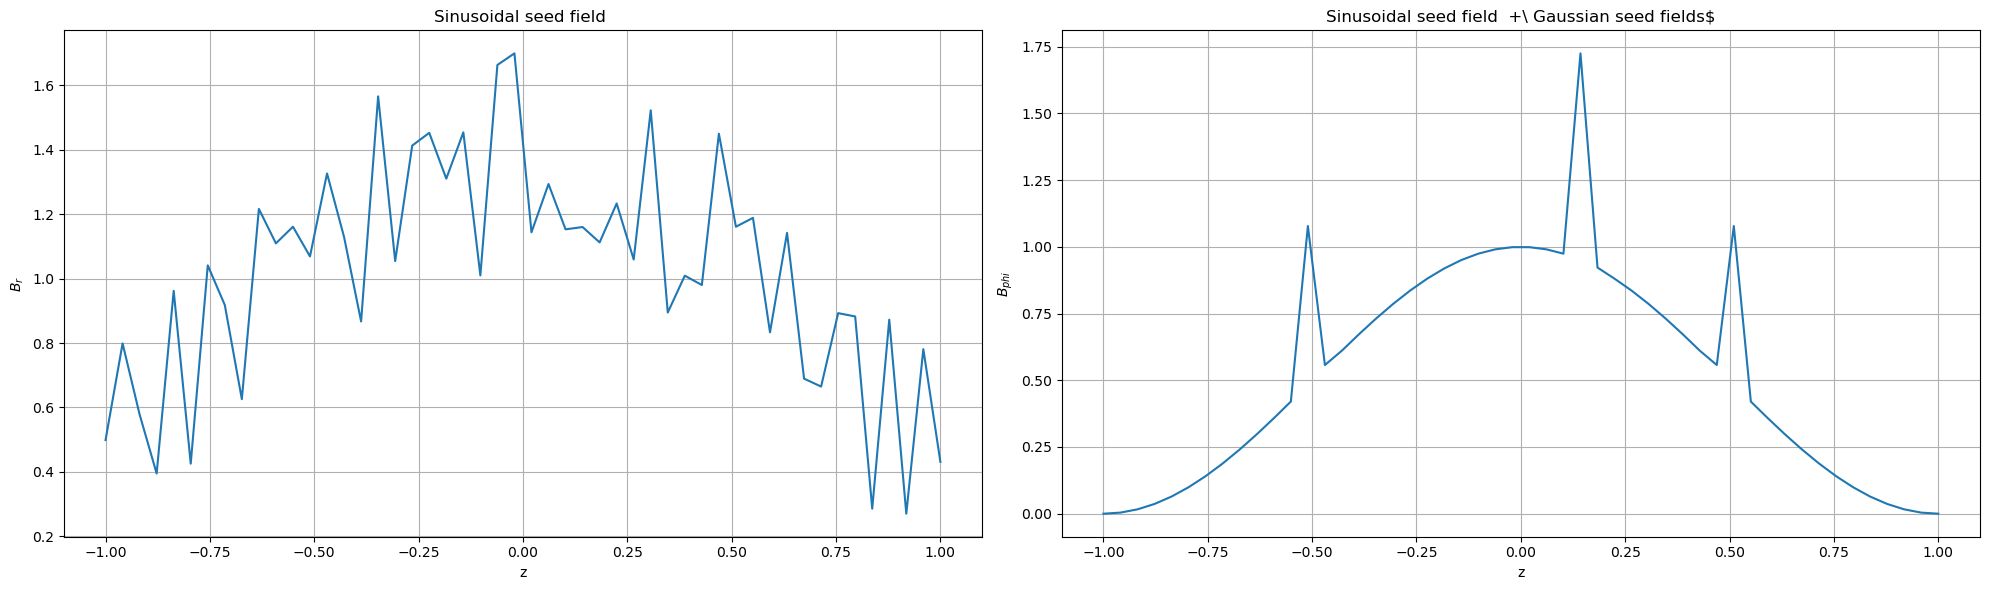

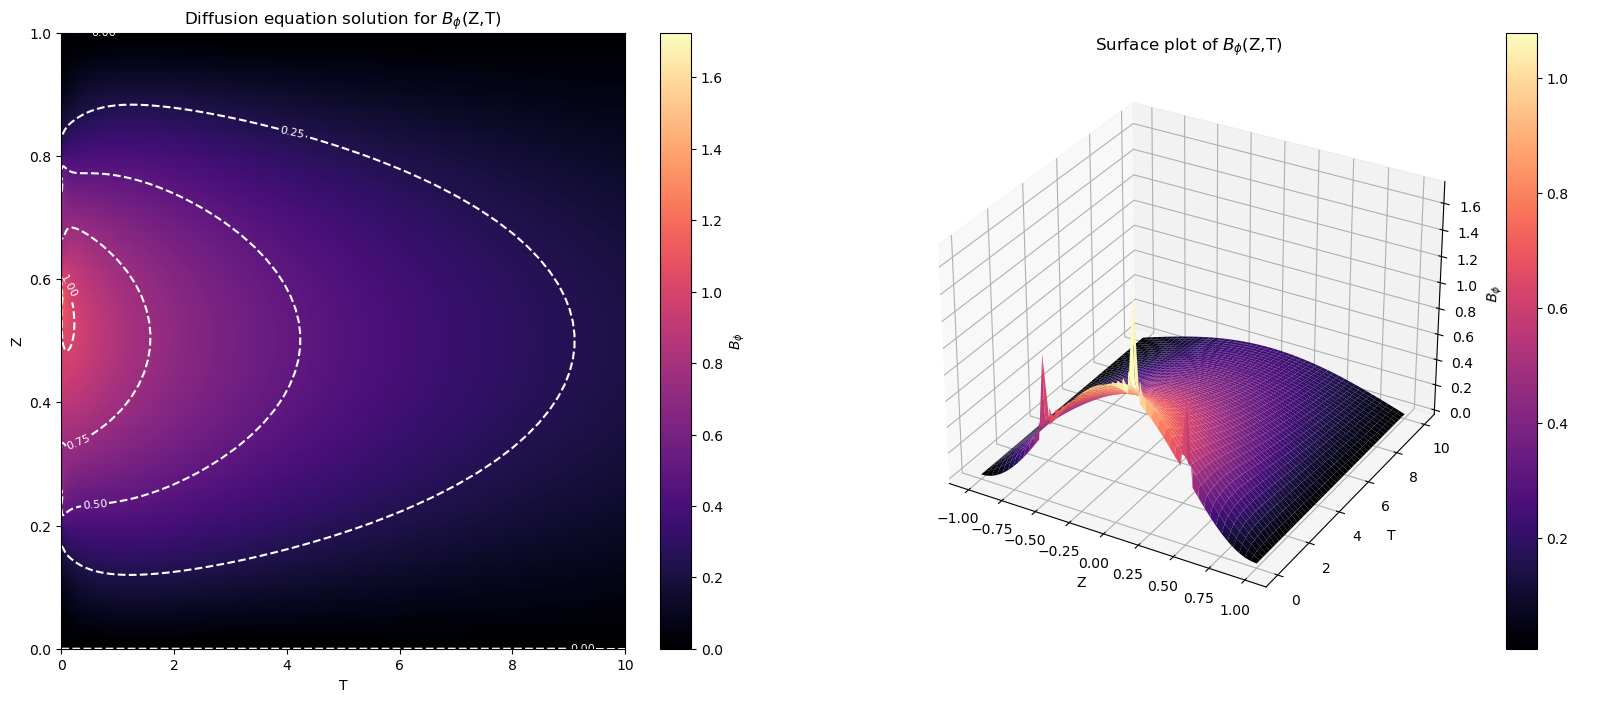

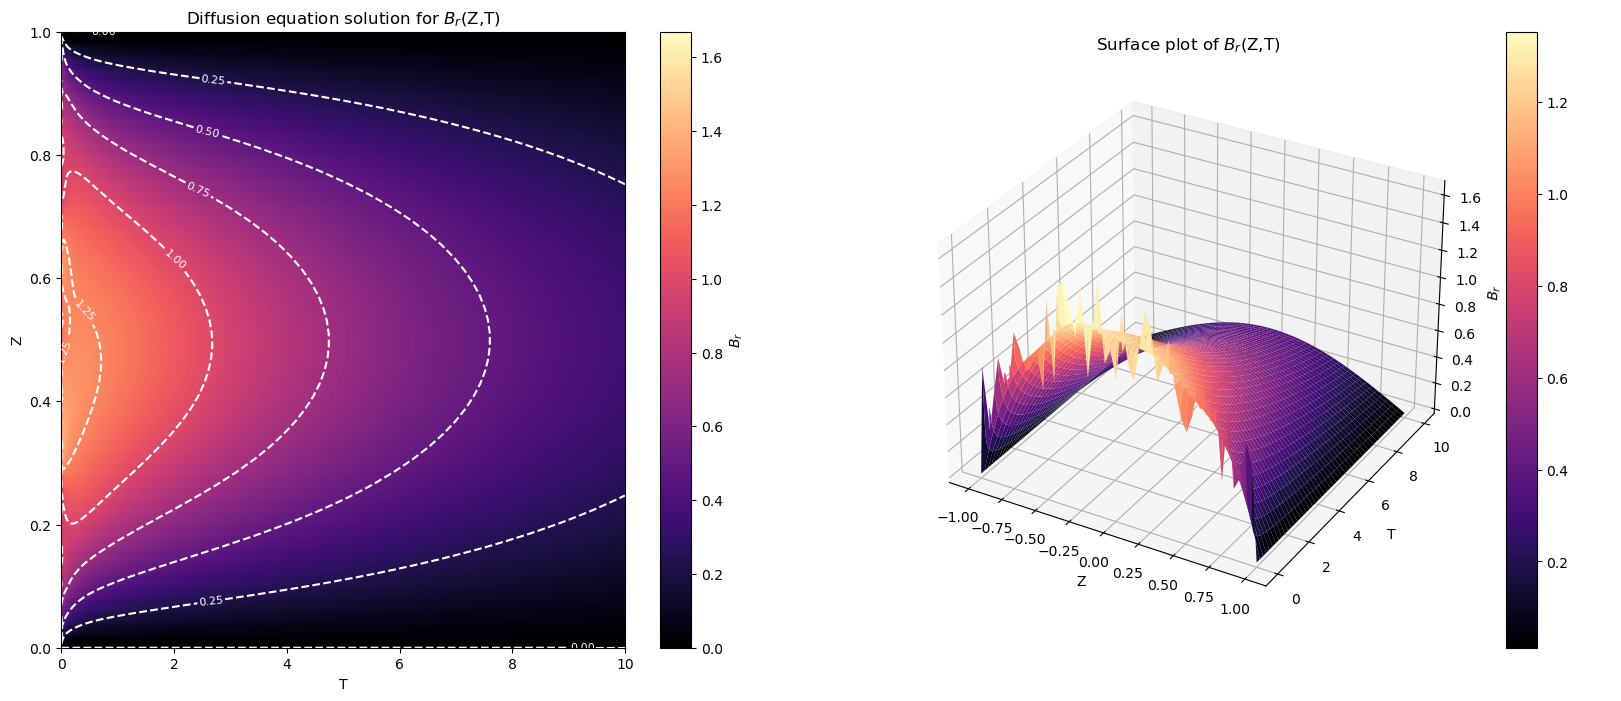

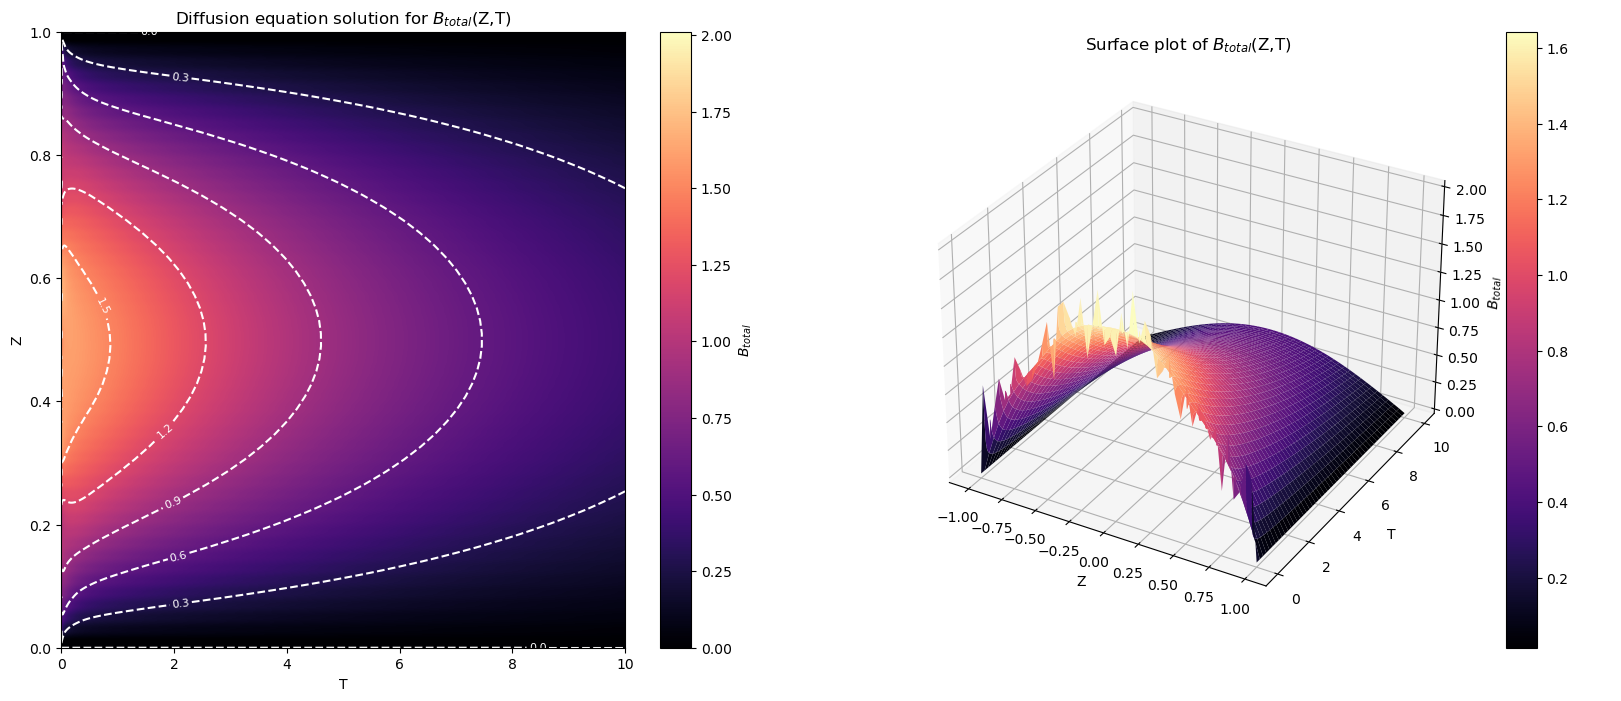

/tmp/ipykernel_20998/3157975885.py:66: RuntimeWarning: invalid value encountered in divide
  pitch_angle = np.degrees(np.arctan(U_r/U_phi))


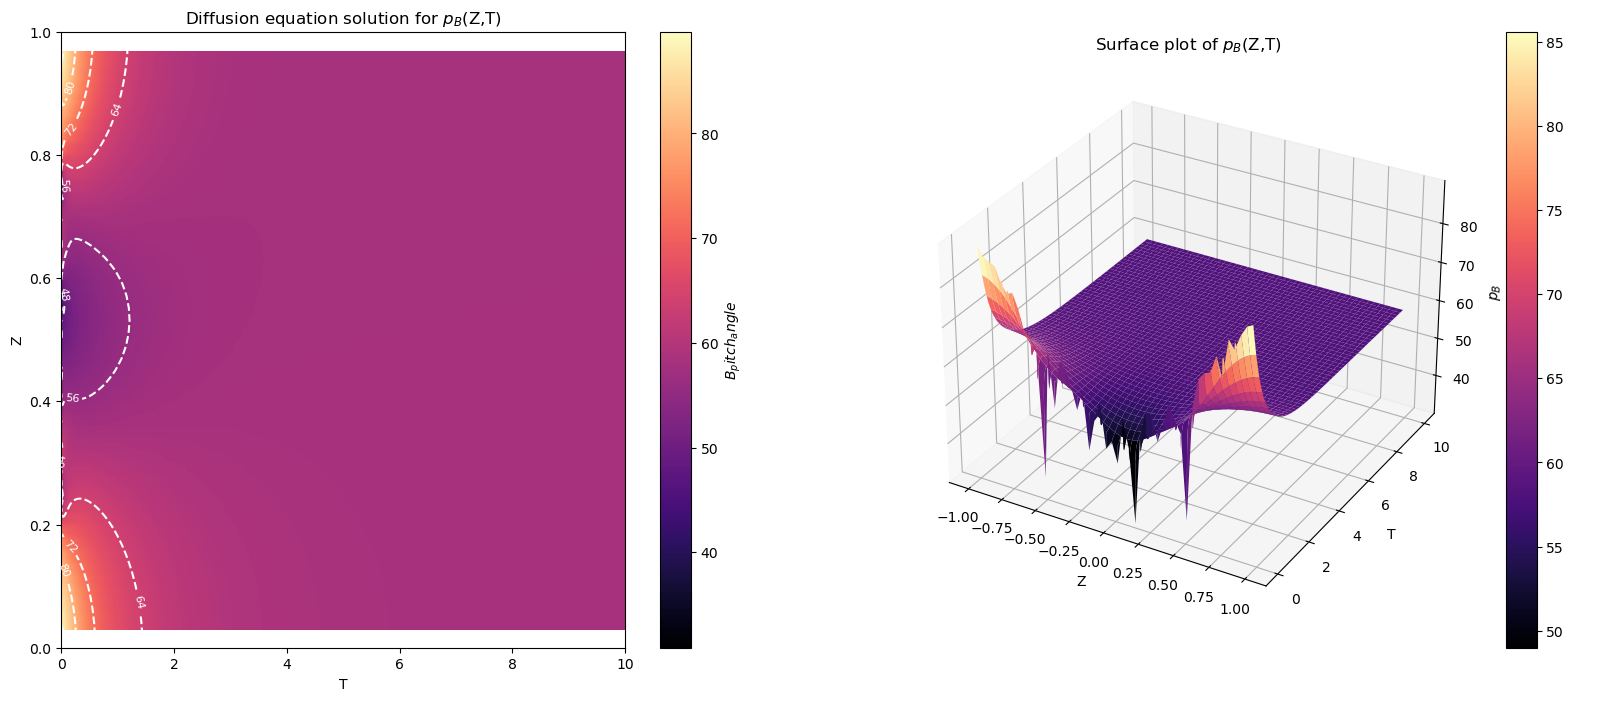

In [7]:
T = 10  # simulation time
L = 1   # half length of the box
M = 50  # spacing in L
N = 5000 # spacing in T


#'''
#Initial Conditions 2
title_1 = r'Sinusoidal seed field '
title_2 = r'Sinusoidal seed field  +\ Gaussian seed fields$'
def init_cond_Br(z):
	noise_amplitude = 0.75
	return np.cos(np.pi * z / 2).round(5) + (noise_amplitude * np.random.rand(len(z)))

def init_cond_Bphi(z):
	peaks_pos = np.array([-0.5, 0.15, 0.5])
	peak_amplitude = 1
	peak_width = 0.01
	initial_conditions = np.cos(np.pi*(z)/2)**2
	for peak_pos in peaks_pos:
		initial_conditions += peak_amplitude * np.exp(-0.5 * ((z - peak_pos) / peak_width)**2)
	return initial_conditions
#'''


z = np.linspace(-L, L, M)
#print(z)


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()


U_phi, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=init_cond_Bphi, eta_T = 3.48e-2, T=T, L=L)

U_r, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=init_cond_Br, eta_T = 3.48e-2, T=T, L=L)

#'''

plot_B(U_phi, tspan, xspan, T, L, '\phi')
plot_B(U_r, tspan, xspan, T, L, 'r')
#plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}')
#plot_B_animation(U_r, tspan, xspan, T, L, 'r')

B_total = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total, tspan, xspan, T, L, '{total}')
#plot_B_animation(B_total, tspan, xspan, T, L, '{total}')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
#plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle')

#'''

-0.06173564540105034 0.2386438316389634


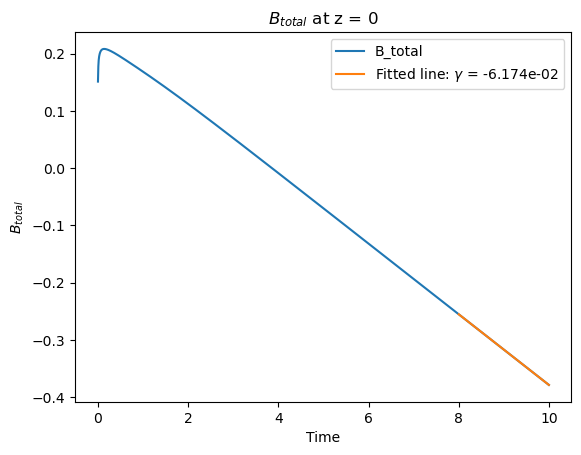

In [8]:
B_mid = np.log10(B_total[int(M/2),:])
#m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)
m, c = np.polyfit(tspan[-1000:], B_mid[-1000:], 1)

plt.plot(tspan, B_mid, label='B_total', zorder = 1)
print(m,c)

# Calculate fitted line
fitted_line = m * tspan[-1000:] + c


# Plot fitted line
plt.plot(tspan[-1000:], fitted_line, label=f'Fitted line: $\gamma$ = {m:.3e}', zorder = 2)

# Add x and y labels
plt.xlabel('Time')
plt.ylabel('$B_{total}$')
plt.title('$B_{total}$ at z = 0')

# Show legend
plt.legend()

# Display the plot
plt.show()

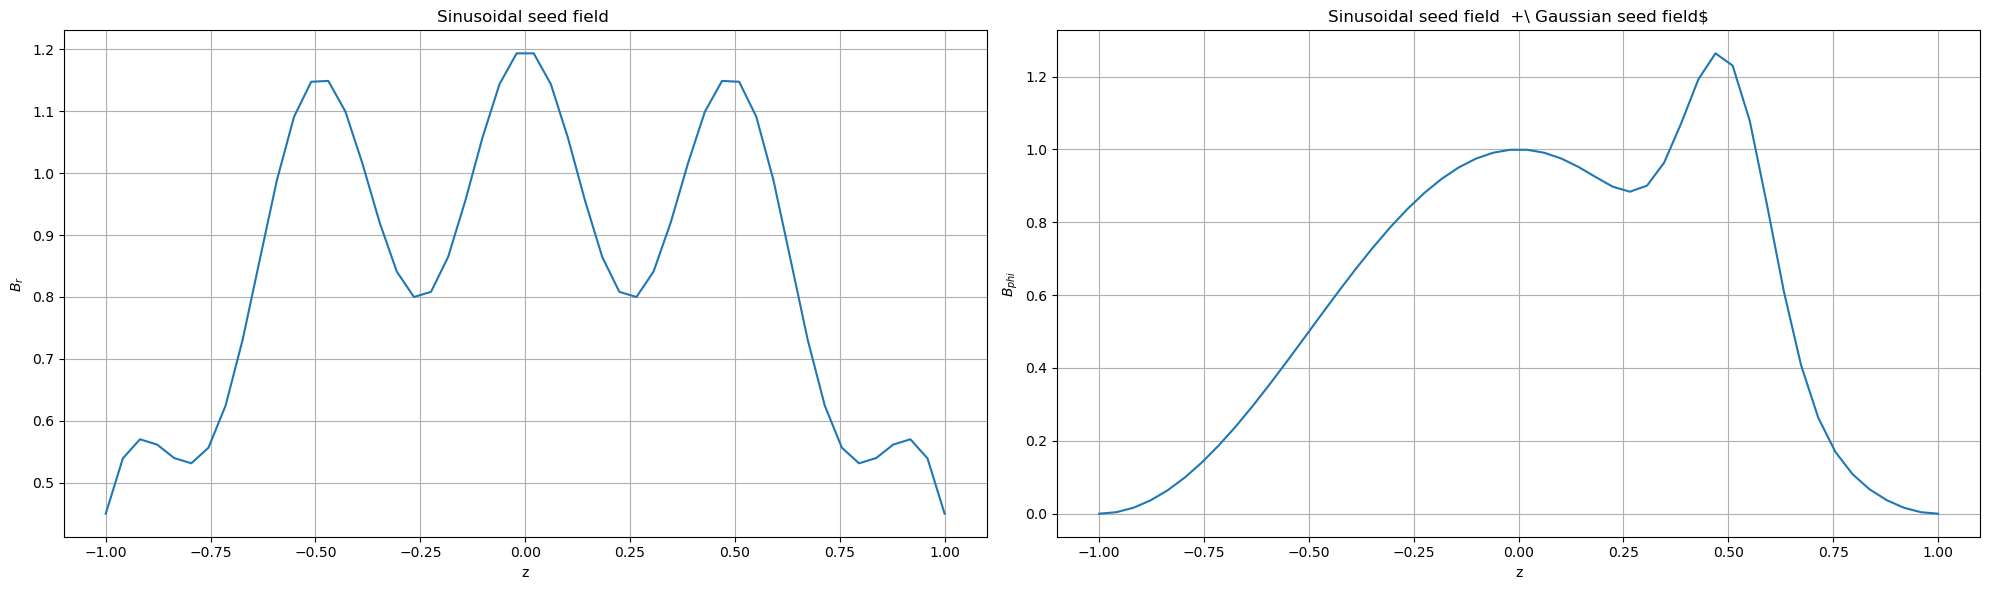

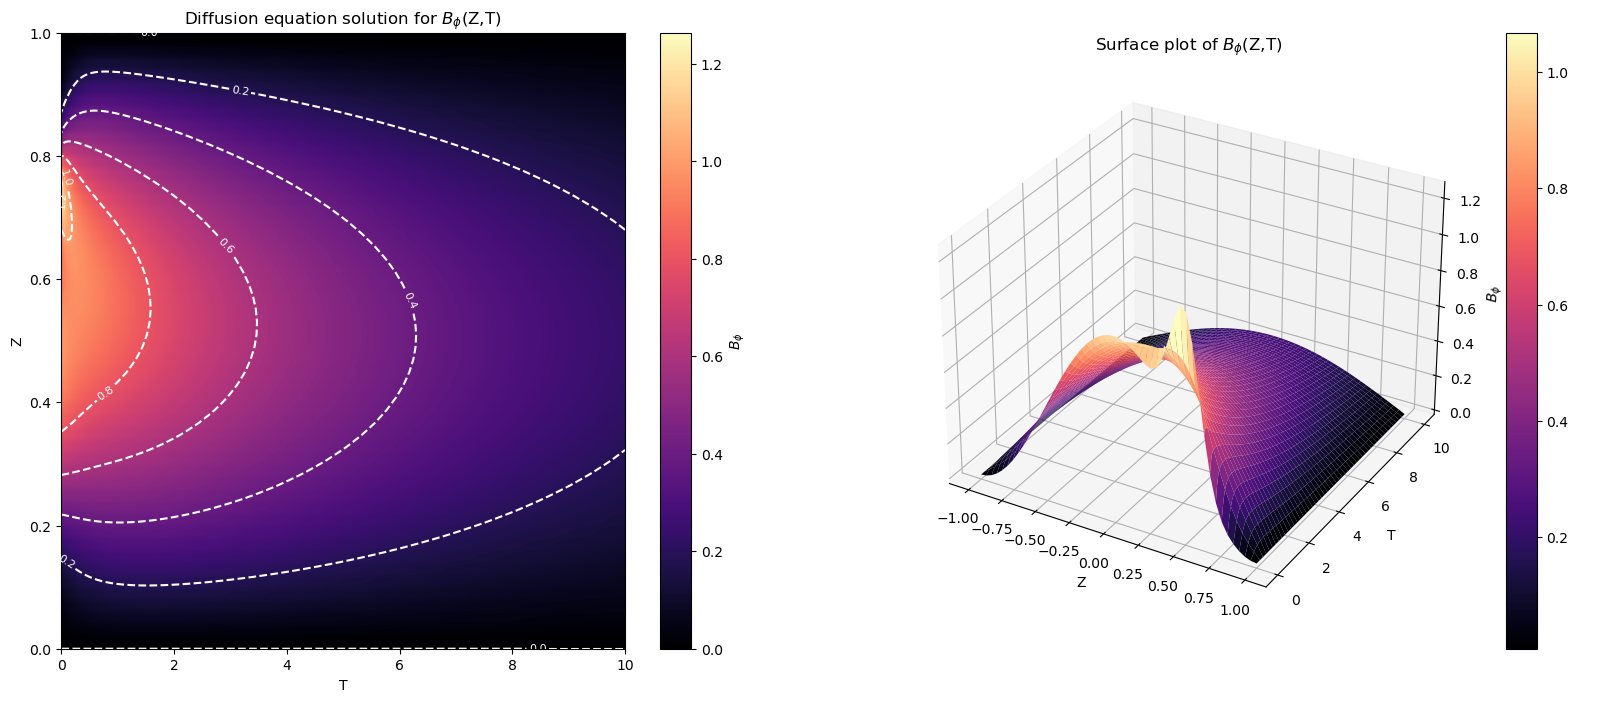

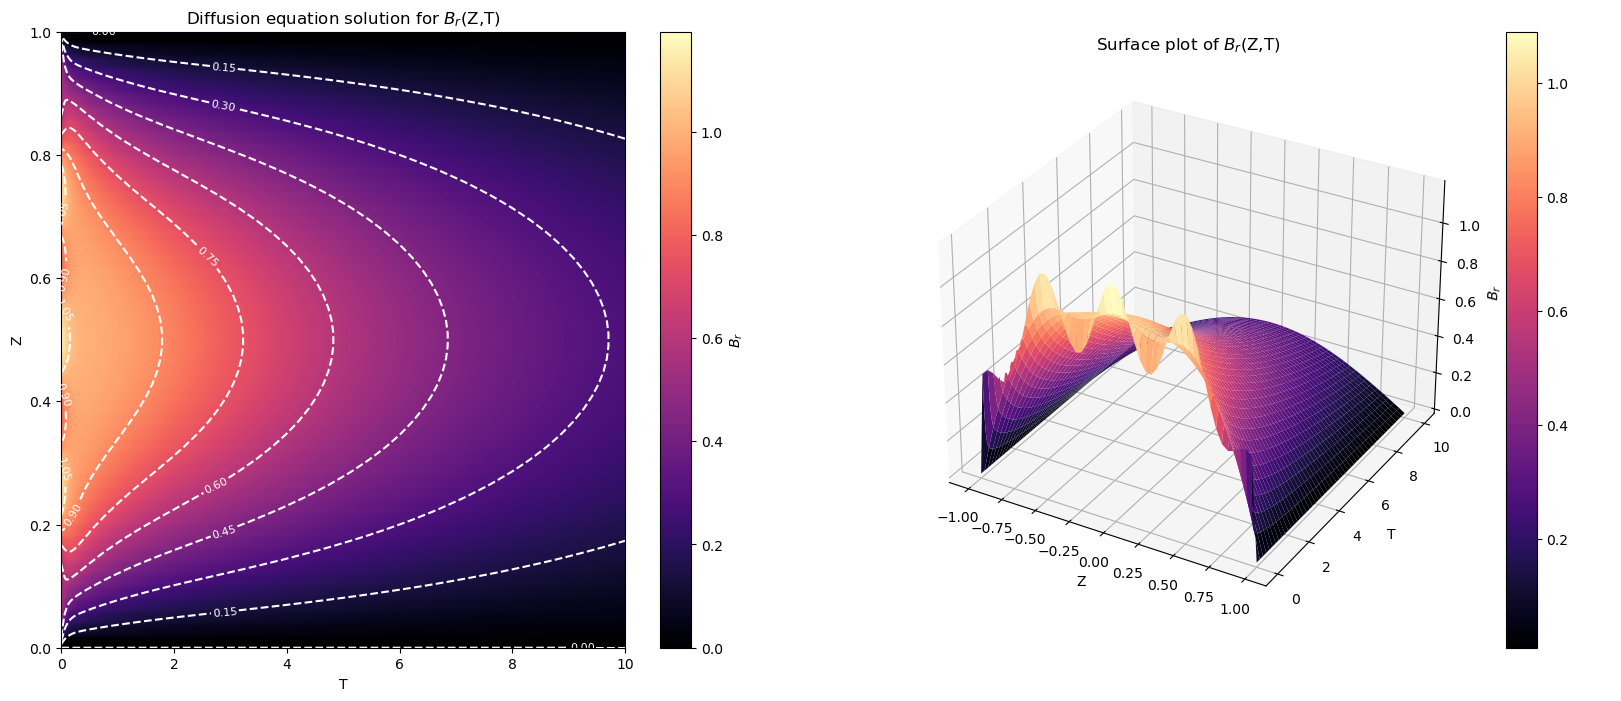

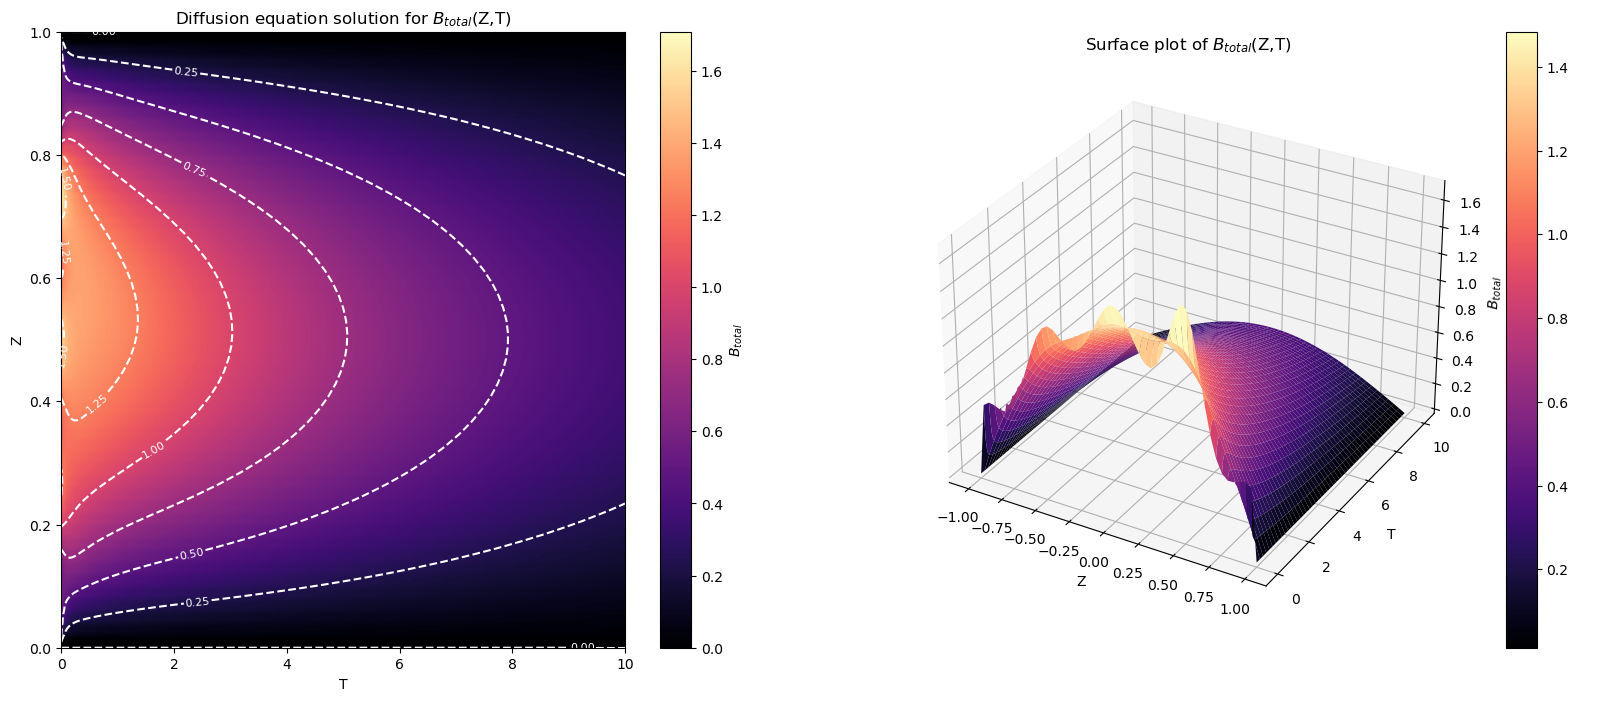

/tmp/ipykernel_20998/1794850995.py:61: RuntimeWarning: invalid value encountered in divide
  pitch_angle = np.degrees(np.arctan(U_r/U_phi))


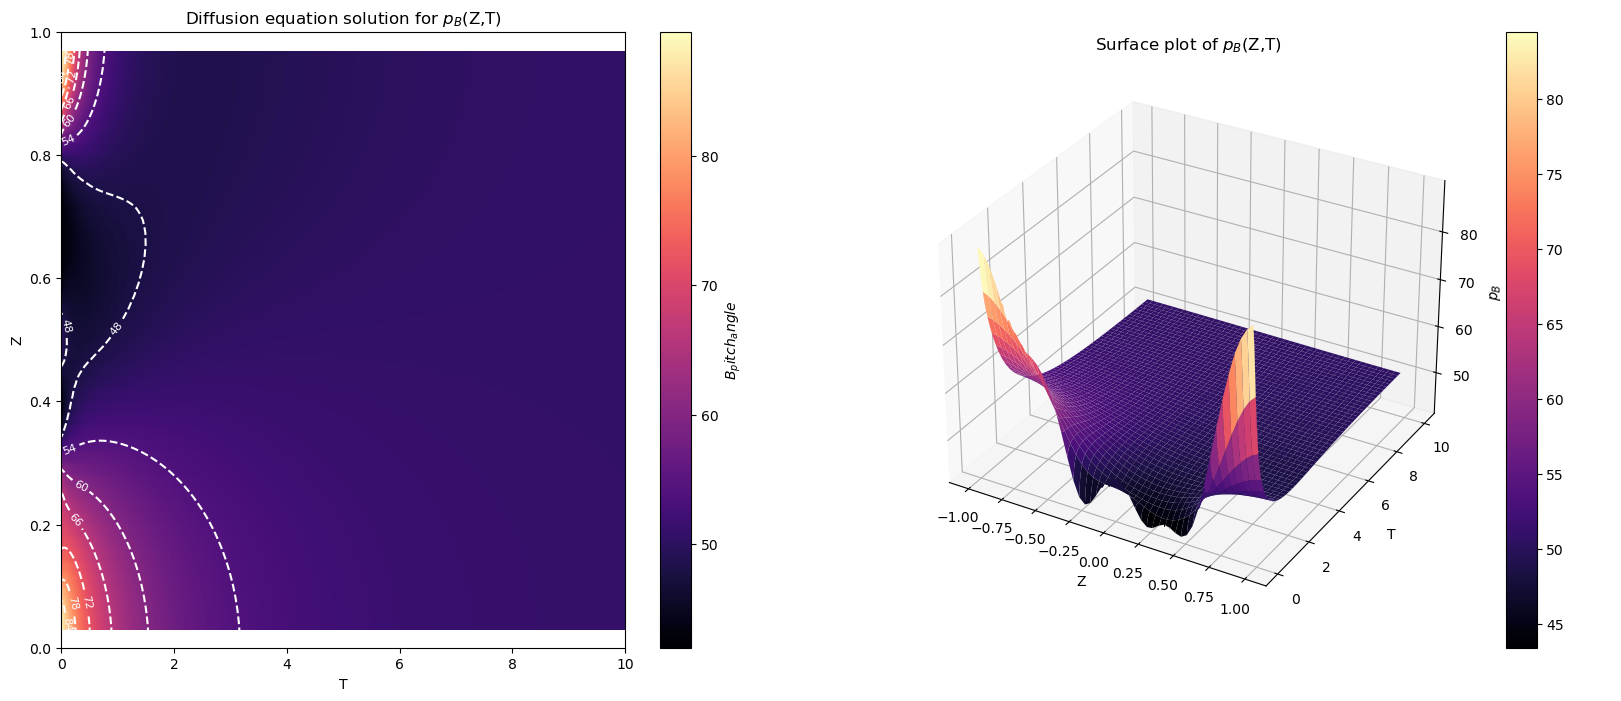

In [9]:
T = 10  # simulation time
L = 1   # half length of the box
M = 50  # spacing in L
N = 5000 # spacing in T

#'''
#Initial Conditions 3
title_1 = r'Sinusoidal seed field '
title_2 = r'Sinusoidal seed field  +\ Gaussian seed field$'
def init_cond_Br(z):
	return 1 - 0.75*z**4 + 0.2*np.cos(4*np.pi*z)

def init_cond_Bphi(z):
	peak_amplitude = 0.75
	initial_conditions = np.cos(np.pi*(z)/2)**2 + peak_amplitude * np.exp(-0.5 * ((z -0.5 ) / 0.1)**2)
	return initial_conditions
#'''



z = np.linspace(-L, L, M)
#print(z)


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()


U_phi, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=init_cond_Bphi, eta_T = 3.48e-2, T=T, L=L)

U_r, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=init_cond_Br, eta_T = 3.48e-2, T=T, L=L)

#'''

plot_B(U_phi, tspan, xspan, T, L, '\phi')
plot_B(U_r, tspan, xspan, T, L, 'r')
#plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}')
#plot_B_animation(U_r, tspan, xspan, T, L, 'r')

B_total = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total, tspan, xspan, T, L, '{total}')
#plot_B_animation(B_total, tspan, xspan, T, L, '{total}')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
#plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle')

#'''

-0.06175812851443512 0.18830155528562026


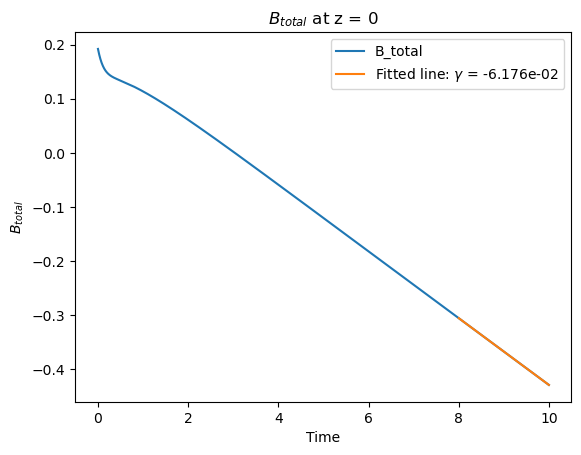

In [10]:
B_mid = np.log10(B_total[int(M/2),:])
#m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)
m, c = np.polyfit(tspan[-1000:], B_mid[-1000:], 1)

plt.plot(tspan, B_mid, label='B_total', zorder = 1)
print(m,c)

# Calculate fitted line
fitted_line = m * tspan[-1000:] + c


# Plot fitted line
plt.plot(tspan[-1000:], fitted_line, label=f'Fitted line: $\gamma$ = {m:.3e}', zorder = 2)

# Add x and y labels
plt.xlabel('Time')
plt.ylabel('$B_{total}$')
plt.title('$B_{total}$ at z = 0')

# Show legend
plt.legend()

# Display the plot
plt.show()